<a href="https://colab.research.google.com/github/JoseFerrer/AUNA_geo/blob/main/Introduction_to_GEOParse_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to python GEOParse Library**

Notebook description

## **Introduction to Molecular Biological**

**Molecular Biology** explains the processes involved in genetic inheritance. We start with the ***DNA*** that is transcribed into RNA, then the ***RNA*** is translated into ***Protein***, and finally, from the product of the enzymatic reactions that occur in the cell (*Attention*: enzymes are also proteins) we obtain the ***Metabolites***.

Some important definitions:

* ***Genome*** (*ome: set*): 
    1. Set of Genes
    2. Totality of genetic information that an organism or species possesses.
* ***Epigenome***: 
    1. The epigenome is the set of all of the epigenetic marks on the DNA in a single cell. The epigenomic marks different between different cell types. 
    2. Some DNA sequence change because certain genes switch to on or off due to external environment like the age. This process is called epigenetic changes and its studies is called epigenomics.
    3. The epigenome consists of chemical compounds that modify the genome in a way that tells it what to do, where to do it, and when to do it. Different cells have different epigenetic marks, which are not part of the DNA itself, can be passed on from cell to cell as cells divide, and from one generation to the next.
* ***Transcriptome***: 
    1. Set of RNAs (mRNA or messenger RNA) or transcripts
    2. Set of genes that are being expressed at any given time in a cell. Transcriptomes are variable between cells of the same organism.
* ***Proteome***: 
    1. Set of Proteins
    2. Totality of proteins expressed in a particular cell under specific environmental conditions and stage of development. Complete proteome of an organism: all cellular proteomes.
* ***Metabolome***: 
    1. Set of Metabolites
    2. A quantified set of low molecular weight molecules or metabolites present in certain cells or tissues of a certain physiological or developmental state.
* ***Phenotype***: 
    1. Set of observable characteristics of an individual resulting from the interaction of its genotype with the environment.


Now let's look at a concept as important as phenotype. If phenotype is determined by the structural proteins and metabolites present in the cell. We see that the phenotype is the result of a chain process that begins with the genomes but also involves other factors such as diet, environment, lifestyle, etc.




**Observations**:

* The passage from DNA to proteins is carried out by the messenger RNA or transcriptome, but many genes are only transcribed into RNA without reaching proteins.

* Genes can be turned on or off depending on the needs and characteristics of a particular cell, giving rise to different compositions of proteins or proteome, this is called ***gene regulation***.

* The proteins are organized among themselves to form working groups, for example, the group of proteins linked to the glucose process.

* The transcriptome, proteome and metabolome are variable in space and time, that is, they can change.

* The genome does not change.

## **Download GEOParse package and Import Libraries**

In [ ]:
!pip install GEOparse -q

     |████████████████████████████████| 278 kB 8.4 MB/s 


In [ ]:
import GEOparse as gp
import pandas as pd
import numpy as np
import seaborn as sns

## **Download Datasets from Gene Expression Omnibus**

### **About Datasets**

All this information is extracted from paper: "[NCBI GEO: mining tens of millions of expression profiles — database and tools update](https://doi.org/10.1093/nar/gkl887)"

#### **The Platform**
Summary description of the array and a data table defining the array template Each row in the table corresponds to a single feature. Includes:
* Sequence annotation
* Tracking information as provided by the submitter. 

The table may contain any number of columns allowing thorough annotation of the array.

#### **Sample**
Description of the biological material and the experimental protocols to which it was subjected, and a data table containing hybridization measurements for each feature on the corresponding platform. 

The table may contain any number of columns in which to comprehensively present hybridization results. The metadata fields may hold very large volumes of text to allow elaborate descriptions of the biological source and protocols.

#### **Series**
Defines a set of related samples considered to be part of a study, and describes the overall study aim and design. Series may also incorporate tabular summary tables pertaining to the experiment as a whole.

Each of these objects is essentially under the submitter’s editorial control and is assigned a stable and unique accession number that may be used to cite and retrieve the records. The accession consists of a number and a letter prefix indicating whether the record is a GEO Platform (GPL), GEO Sample (GSM), or GEO Series (GSE).

DataSets provide two discrete renderings of the data (Figure 1):

(i) An experiment-centered representation that encapsulates the entire study. This information is presented as a DataSet record which comprises a synopsis of the experiment, a breakdown of the experimental variables, access to auxiliary objects, several data display and analysis tools, and download options.

(ii) A gene-centered representation that presents quantitative gene expression measurements for one gene across a DataSet. This information is presented as a GEO Profile which comprises gene identity annotation, DataSet title, links to auxiliary information and a chart depicting the expression level and rank of that gene across each sample in the DataSet. Gene annotation is derived from querying sequence identifiers (e.g. GenBank accessions, clone IDs) with the latest Entrez Gene and UniGene databases, an important point given the dynamic nature of gene annotation.

#### **GEOSoft**

## ***Download a Dataset with get_GEO***

Check: https://geoparse.readthedocs.io/en/latest/GEOparse.html#

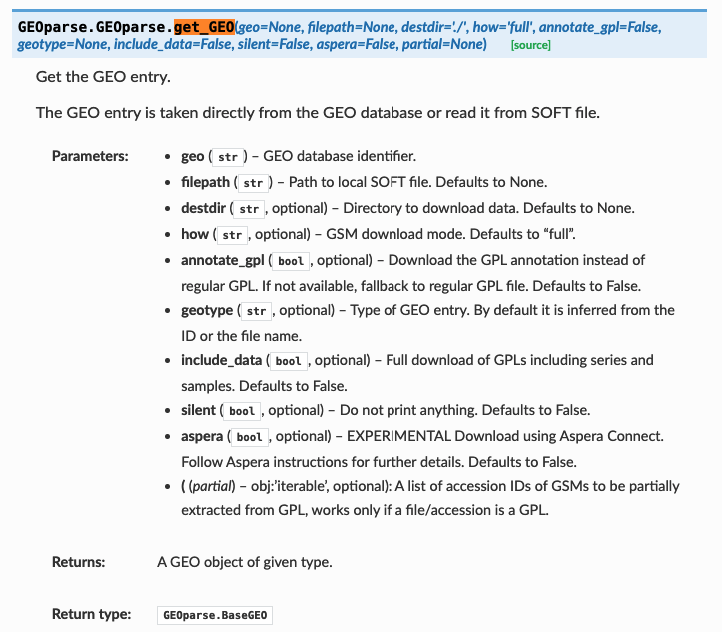

In [ ]:
gse = gp.get_GEO("GSE28735", silent=True)

We are using the data from the publication that has accession number "GSE28735" and has the following description:

* **Title**: "*Microarray gene-expression profiles of 45 matching pairs of pancreatic tumor and adjacent non-tumor tissues from 45 patients with pancreatic ductal adenocarcinoma*".
* **Experiment type**:	Expression profiling by array
* **Summary**:	In order to identify biologically relevant tumor markers with prognostic significance, we set out to analyze gene expression profiling of tumor and adjacent non-tumor tissues from PDAC cases.
We compared the microarray gene-expression profiles of 45 matching pairs of pancreatic tumor and adjacent non-tumor tissues. This data set were used to obtained genes that were differentially expressed and associated with survival. 51 genes were selected for further validation.
* **Overall design**:	90 total samples were analyzed. We compared gene expression profile of 45 pairs of pancreatic tumor and adjacent non-tumor tissues using Affymetrix GeneChip Human Gene 1.0 ST arrays. Tumor gene expression profiles were distinctly different from non-tumor profiles. Using ANOVA in Partek®, 7352 independent genes were found to be differentially expressed in tumors (P<0.01). We next performed Cox-regression analysis and identified 928 of the differentially expressed genes that were associated with survival (P<0.1). The list of genes was then subjected to pathway and biomarker analyses using Ingenuity Pathways Analysis (IPA). Based on literatures supporting their roles in cancer, 51 genes were selected for further analyses
 	
* **Contributor(s)**:	Hussain SP

For more information: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE28735

## ***Let's look at the data***

Now let's see how many samples there are, how many patients we have and which patients have tumors.

In [ ]:
for gsm_name, gsm in gse.gsms.items():
  print("Sample Name: %s, Source name: %s" % (gsm_name, gsm.get_metadata_attribute('source_name_ch1')))

Sample Name: GSM711904, Source name: tumor tissue, patient 1
Sample Name: GSM711905, Source name: non-tumor tissue, patient 1
Sample Name: GSM711906, Source name: tumor tissue, patient 2
Sample Name: GSM711907, Source name: non-tumor tissue, patient 2
Sample Name: GSM711908, Source name: tumor tissue, patient 3
Sample Name: GSM711909, Source name: non-tumor tissue, patient 3
Sample Name: GSM711910, Source name: tumor tissue, patient 4
Sample Name: GSM711911, Source name: non-tumor tissue, patient 4
Sample Name: GSM711912, Source name: tumor tissue, patient 5
Sample Name: GSM711913, Source name: non-tumor tissue, patient 5
Sample Name: GSM711914, Source name: tumor tissue, patient 6
Sample Name: GSM711915, Source name: non-tumor tissue, patient 6
Sample Name: GSM711916, Source name: tumor tissue, patient 7
Sample Name: GSM711917, Source name: non-tumor tissue, patient 7
Sample Name: GSM711918, Source name: tumor tissue, patient 8
Sample Name: GSM711919, Source name: non-tumor tissue, pa

In [ ]:
count = 0
for gsm_name, gsm in gse.gsms.items():
  print("Sample Name: ", gsm_name)
  print("Metadata:",)
  for key, value in gsm.metadata.items():
      print(" - %s : %s" % (key, ", ".join(value)))
  count += 1
  if count >= 2:
    break

Sample Name:  GSM711904
Metadata:
 - title : human pancreatic tumor tissue, patient sample 1
 - geo_accession : GSM711904
 - status : Public on Jul 09 2012
 - submission_date : Apr 20 2011
 - last_update_date : Jul 09 2012
 - type : RNA
 - channel_count : 1
 - source_name_ch1 : tumor tissue, patient 1
 - organism_ch1 : Homo sapiens
 - taxid_ch1 : 9606
 - characteristics_ch1 : tissue: T, survival_month: 51, cancer_death: 1
 - molecule_ch1 : total RNA
 - extract_protocol_ch1 : Tissues were flash frozen immediately after surgery.RNA from frozen tissue samples was extracted using standard TRIZOL (Invitrogen) protocol. RNA quality was confirmed with the Agilent 2100 Bioanalyzer (Agilent Technologies) before the microarray gene expression profiling
 - label_ch1 : biotin
 - label_protocol_ch1 : Samples were enzymatically fragmented and biotinylated using the WT Terminal Labeling Kit (Affymetrix)
 - hyb_protocol : Samples were hybridized using Affymetrix GeneChip Hybridization, Wash, and Stain

In [ ]:
for gsm_name, gsm in gse.gsms.items():
  gsm.table
  break

In [ ]:
for gsm_name, gsm in gse.gsms.items():
  print("Mombre: ", gsm_name)
  print("Metadata:",)
  for key, value in gsm.metadata.items():
      print(" - %s : %s" % (key, ", ".join(value)))
  print ("Tabla de datos:",)
  print (gsm.table.head())
  break